In [10]:
#from connectors import Impala
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#impala = Impala()

In [170]:
query = '''
select nvl(a.country, 'N/D') as country,
       l.lot,
       count(distinct l.id) as n_total_bidders,
       sum(l.cr_bidder) as n_cr_bidders,
       sum(l.bid) as total_bids_sum,
       sum(l.winner) as n_total_winners
  from (
        select id,
               lot,
               sum(case when action = 'placebid'
                   then cast(bid as int)
                   when action = 'cancelbid'
                   then -1 * cast(bid as int)
                   else 0 end ) as final_bid_size,
               max(if(currency like '%cr%', 1, 0)) as cr_bidder,
               max(if(action = 'win', 1, 0)) as winner
          from dataset1
         where dt between 'yyyy-mm-dd' and 'yyyy-mm-dd'
           and invoice = 1
           and status = "Completed"
         group by id,
                  lot
       ) l
  left join (
             select distinct id as spa, value as country
               from dataset2
              where name = 'country'
  ) a
    on a.spa = l.id
 group by nvl(a.country, 'N/D'),
          l.lot
 order by 2, 1

'''

In [ ]:
#data = impala.fetch(query)

In [ ]:
data.loc[:, 'mean_bid'] = data.total_bids_sum / data.n_total_bidders
data.loc[:, 'winners_share'] = data.n_total_winners / data.n_total_bidders
data.to_excel('statistics.xlsx')
#data

In [ ]:
#data.lot.unique()

In [175]:
data1 = data.loc[data.n_total_bidders >= 10]

In [ ]:
fig, axs = plt.subplots(5, figsize = [25, 25])
axs[0].bar(data1.loc[data1.lot == '1'].sort_values(by=['n_total_bidders'], ascending=False)['country'],
           data1.loc[data1.lot == '1'].sort_values(by=['n_total_bidders'], ascending=False)['n_total_bidders'], color = 'grey', label='1', width=0.8)
axs[0].bar(data1.loc[((data1.lot == '1')&(data1.country == 'KR'))].sort_values(by=['n_total_bidders'], ascending=False)['country'],
           data1.loc[((data1.lot == '1')&(data1.country == 'KR'))].sort_values(by=['n_total_bidders'], ascending=False)['n_total_bidders'], color = 'red',width=0.8)

axs[1].bar(data1.loc[data1.lot == '"2"'].sort_values(by=['n_total_bidders'], ascending=False)['country'],
           data1.loc[data1.lot == '"2"'].sort_values(by=['n_total_bidders'], ascending=False)['n_total_bidders'], color = 'grey', label='2', width=0.8)

axs[2].bar(data1.loc[data1.lot == '"3"'].sort_values(by=['n_total_bidders'], ascending=False)['country'],
           data1.loc[data1.lot == '"3"'].sort_values(by=['n_total_bidders'], ascending=False)['n_total_bidders'], color = 'grey', label='3', width=0.8)
axs[2].bar(data1.loc[((data1.lot == '"3"')&(data1.country == 'KR'))].sort_values(by=['n_total_bidders'], ascending=False)['country'],
           data1.loc[((data1.lot == '"3"')&(data1.country == 'KR'))].sort_values(by=['n_total_bidders'], ascending=False)['n_total_bidders'], color = 'red',  width=0.8)

axs[3].bar(data1.loc[data1.lot == '"4"'].sort_values(by=['n_total_bidders'], ascending=False)['country'],
           data1.loc[data1.lot == '"4"'].sort_values(by=['n_total_bidders'], ascending=False)['n_total_bidders'], color = 'grey', label='4', width=0.8)
axs[3].bar(data1.loc[((data1.lot == '"4"')&(data1.country == 'KR'))].sort_values(by=['n_total_bidders'], ascending=False)['country'],
           data1.loc[((data1.lot == '"4"')&(data1.country == 'KR'))].sort_values(by=['n_total_bidders'], ascending=False)['n_total_bidders'], color = 'red', width=0.8)

axs[4].bar(data1.loc[data1.lot == '"5"'].sort_values(by=['n_total_bidders'], ascending=False)['country'],
           data1.loc[data1.lot == '"5"'].sort_values(by=['n_total_bidders'], ascending=False)['n_total_bidders'], color = 'grey', label='5', width=0.8)
axs[4].bar(data1.loc[((data1.lot == '"5"')&(data1.country == 'KR'))].sort_values(by=['n_total_bidders'], ascending=False)['country'],
           data1.loc[((data1.lot == '"5"')&(data1.country == 'KR'))].sort_values(by=['n_total_bidders'], ascending=False)['n_total_bidders'], color = 'red', width=0.8)

axs[0].set_title('Number of bidders by countries and lots', fontsize=20)
plt.xlabel("Country", fontsize=18)
axs[0].set_ylabel('Number of bidders', fontsize=16)
axs[1].set_ylabel('Number of bidders', fontsize=16)
axs[2].set_ylabel('Number of bidders', fontsize=16)
axs[3].set_ylabel('Number of bidders', fontsize=16)
axs[4].set_ylabel('Number of bidders', fontsize=16)
axs[0].legend(loc ='upper right', fontsize=16)
axs[1].legend(loc ='upper right', fontsize=16)
axs[2].legend(loc ='upper right', fontsize=16)
axs[3].legend(loc ='upper right', fontsize=16)
axs[4].legend(loc ='upper right', fontsize=16)
axs[0].set_ylim(0, 7000)
axs[1].set_ylim(0, 22000)
axs[2].set_ylim(0, 500)
axs[3].set_ylim(0, 350)
axs[4].set_ylim(0, 2000)
axs[0].bar_label(axs[0].containers[0], padding=7, fontsize=10)
axs[1].bar_label(axs[1].containers[0], padding=7, fontsize=10)
axs[2].bar_label(axs[2].containers[0], padding=7, fontsize=10)
axs[3].bar_label(axs[3].containers[0], padding=7, fontsize=10)
axs[4].bar_label(axs[4].containers[0], padding=7, fontsize=10)
axs[0].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='x', labelsize=14)
axs[2].tick_params(axis='x', labelsize=14)
axs[3].tick_params(axis='x', labelsize=14)
axs[3].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)
axs[2].tick_params(axis='y', labelsize=14)
axs[3].tick_params(axis='y', labelsize=14)
axs[4].tick_params(axis='y', labelsize=14)


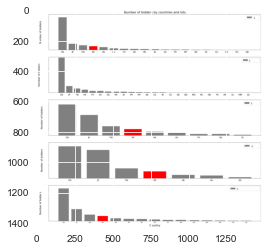

In [13]:
img = plt.imread('barchart1.png')
plt.imshow(img)
plt.show()

In [ ]:
fig, axs = plt.subplots(4, figsize = [25, 20])
axs[0].bar(data.loc[data.lot == '"1"'].sort_values(by=['mean_bid'], ascending=False)['country'],
           data.loc[data.lot == '"1"'].sort_values(by=['mean_bid'], ascending=False)['mean_bid'], color = 'grey', label='1', width=0.8)
axs[0].bar(data.loc[((data.lot == '"1"')&(data.country == 'KR'))].sort_values(by=['mean_bid'], ascending=False)['country'],
           data.loc[((data.lot == '"1"')&(data.country == 'KR'))].sort_values(by=['mean_bid'], ascending=False)['mean_bid'], color = 'red',width=0.8)

axs[1].bar(data.loc[data.lot == '"2"'].sort_values(by=['mean_bid'], ascending=False)['country'],
           data.loc[data.lot == '"2"'].sort_values(by=['mean_bid'], ascending=False)['mean_bid'], color = 'grey', label='2', width=0.8)
axs[1].bar(data.loc[((data.lot == '"2"')&(data.country == 'KR'))].sort_values(by=['mean_bid'], ascending=False)['country'],
           data.loc[((data.lot == '"2"')&(data.country == 'KR'))].sort_values(by=['mean_bid'], ascending=False)['mean_bid'], color = 'red',  width=0.8)

axs[2].bar(data.loc[data.lot == '"3"'].sort_values(by=['mean_bid'], ascending=False)['country'],
           data.loc[data.lot == '"3"'].sort_values(by=['mean_bid'], ascending=False)['mean_bid'], color = 'grey', label='3', width=0.8)
axs[2].bar(data.loc[((data.lot == '"3"')&(data.country == 'KR'))].sort_values(by=['mean_bid'], ascending=False)['country'],
           data.loc[((data.lot == '"3"')&(data.country == 'KR'))].sort_values(by=['mean_bid'], ascending=False)['mean_bid'], color = 'red', width=0.8)

axs[3].bar(data.loc[data.lot == '"4"'].sort_values(by=['mean_bid'], ascending=False)['country'],
           data.loc[data.lot == '"4"'].sort_values(by=['mean_bid'], ascending=False)['mean_bid'], color = 'grey', label='4', width=0.8)
axs[3].bar(data.loc[((data.lot == '"4"')&(data.country == 'KR'))].sort_values(by=['mean_bid'], ascending=False)['country'],
           data.loc[((data.lot == '"4"')&(data.country == 'KR'))].sort_values(by=['mean_bid'], ascending=False)['mean_bid'], color = 'red', width=0.8)

axs[0].set_title('Average bid size in bid currency by countries and lots', fontsize=20)
plt.xlabel("Country", fontsize=18)
axs[0].set_ylabel('Average bid size', fontsize=16)
axs[1].set_ylabel('Average bid size', fontsize=16)
axs[2].set_ylabel('Average bid size', fontsize=16)
axs[3].set_ylabel('Average bid size', fontsize=16)
axs[0].legend(loc ='upper right', fontsize=16)
axs[1].legend(loc ='upper right', fontsize=16)
axs[2].legend(loc ='upper right', fontsize=16)
axs[3].legend(loc ='upper right', fontsize=16)
axs[0].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='x', labelsize=14)
axs[2].tick_params(axis='x', labelsize=14)
axs[3].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)
axs[2].tick_params(axis='y', labelsize=14)
axs[3].tick_params(axis='y', labelsize=14)

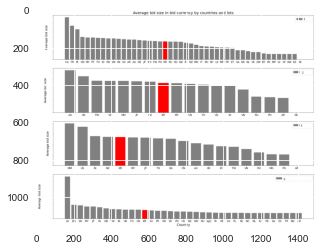

In [14]:
img = plt.imread('barchart2.png')
plt.imshow(img)
plt.show()